In [1]:
import keras

In [2]:
pip install twilio

     |████████████████████████████████| 1.4 MB 24.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)

In [ ]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='H9BAb7uSbnDwmZby7p_-WT9K6ro7GbxOQEjU4xGCiKHR',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'emergingmethodsforearlydetectiono-donotdelete-pr-17kjalcnxc4dmr'
object_key = 'archive (1).zip'

streaming_body_6 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [9]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_6.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

IncompleteReadError: 0 read, but total bytes expected is 326807773.

In [ ]:
pwd

In [7]:
import os
filenames=os.listdir("/home/wsuser/work/Dataset/Dataset/test_set")

FileNotFoundError: [Errno 2] No such file or directory: '/home/wsuser/work/Dataset/Dataset/test_set'

In [140]:
x_train=train_datagen.flow_from_directory("/home/wsuser/work/Dataset/Dataset/train_set",target_size=(64,64),batch_size=32,class_mode='binary')

Found 436 images belonging to 2 classes.


In [141]:
x_test=test_datagen.flow_from_directory("/home/wsuser/work/Dataset/Dataset/test_set",target_size=(64,64),batch_size=32,class_mode='binary')


Found 121 images belonging to 2 classes.


In [142]:
#to define the linear Initialisation import sequential
from keras.models import Sequential
#to add layers import Dense
from keras.layers import Dense
#to create Convolutional kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer 
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [143]:
model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 16s 1s/step - loss: 0.5724 - accuracy: 0.7592 - val_loss: 0.1975 - val_accuracy: 0.9504
Epoch 2/10
14/14 [==============================] - 16s 1s/step - loss: 0.2793 - accuracy: 0.8830 - val_loss: 0.2521 - val_accuracy: 0.8760
Epoch 3/10
14/14 [==============================] - 15s 1s/step - loss: 0.2410 - accuracy: 0.8899 - val_loss: 0.1248 - val_accuracy: 0.9752
Epoch 4/10
14/14 [==============================] - 15s 1s/step - loss: 0.2130 - accuracy: 0.9060 - val_loss: 0.0942 - val_accuracy: 0.9835
Epoch 5/10
14/14 [==============================] - 15s 1s/step - loss: 0.1948 - accuracy: 0.9197 - val_loss: 0.0921 - val_accuracy: 0.9835
Epoch 6/10
14/14 [==============================] - 16s 1s/step - loss: 0.1746 - accuracy: 0.9220 - val_loss: 0.0954 - val_accuracy: 0.9835
Epoch 7/10
14/14 [==============================] - 16s 1s/step - loss: 0.1627 - accuracy: 0.9358 - val_loss: 0.1013 - val_accuracy: 0.9669
Epoch 8/10
14/14 [==

In [197]:
model.save("forest.h5")

In [198]:
!tar -zcvf Emerging-Methods-for-Early-Detection-of-Forest-Fires.-model_new.tgz forest.h5

forest.h5


In [199]:
ls -1

Dataset/
Emerging
Emerging-Methods-for-Early-Detection-of
Emerging-Methods-for-Early-Detection-of-Forest-Fires.-model_new.tgz
Forest
forest1.h5
forest.h5
image-classification-model_new.tgz
my_model.tar.gz


In [66]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 21.5 MB/s eta 0:00:01


In [175]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
                 "url":"https://us-south.ml.cloud.ibm.com",
                 "apikey":"gpKn2bG1DbCoNzxQUka6-uiDmw3QL8XMNsJqbQ3Cl9Rv"
}
client=APIClient(wml_credentials)

In [176]:
client=APIClient(wml_credentials)

In [177]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [178]:
space_uid = guid_from_space_name(client,'Emerging Methods for Early Detection of Forest Fires.')
print("space UID = " + space_uid)

space UID = e2127f08-3c0a-4296-bfc0-973e49978fc5


In [179]:
client.set.default_space(space_uid)

'SUCCESS'

In [180]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [189]:
software_spec_uid=client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [200]:
model_details = client.repository.store_model(model='Emerging-Methods-for-Early-Detection-of-Forest-Fires.-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                           )
model_id=client.repository.get_model_id(model_details)

In [193]:
model_id

'0fd536a5-9e52-46f6-87bf-f1bf884bf9bd'

In [194]:
client.repository.download(model_id,'my_model.tar.gz')

Successfully saved model content to file: 'my_model.tar.gz'


'/home/wsuser/work/my_model.tar.gz'

In [196]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image


In [206]:
model=load_model("forest.h5")

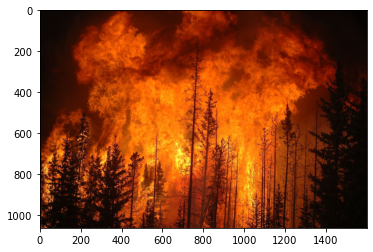

In [209]:
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model("forest.h5")
img=image.load_img("/home/wsuser/work/Dataset/Dataset/train_set/with fire/with fire (14).jpg")
plt.imshow(img)
plt.show()
x=image.img_to_array(img)
res=cv2.resize(x,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [210]:


pred=model.predict(x)
pred = int(pred[0][0])
pred
int(pred)

1

In [211]:
if pred==1:
  print('Forest fire')
  from twilio.rest import Client
  print('Forest fire')
  account_sid='ACae95ea785737954a0a96c91f64101221'
  auth_token='0d013e13203434b42e0916c191b9fc6f'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+18588081954',
      #to number
      to='+918248133285')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")
elif pred==0:
  print('No Fire')

Forest fire
Forest fire
SMa1075ef66a99b7a05825749bea4dca74
Fire detected
SMS Sent!
